# Wordcloud analysis of words from surveys 

In [1]:

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline



# load data for wards with IMD score
filepath = 'C:/Users/lyubo/Documents/DATA_networks/covid19/OpenCOVID19_surveys/OpenCovid19_Surveys.xlsx' #"C:/Users/tupikina/Documents/Datasets/Dataward/2010_Ward_IMD.json"

df = pd.read_excel(filepath)#, index_col=0)

df.head(10)







Timestamp             Name  \
0 2020-03-06 15:51:25.412     Zach Mueller   
1 2020-03-06 16:27:53.373     Derek Jacoby   
2 2020-03-06 16:38:15.226         Kat Holo   
3 2020-03-06 17:44:22.061           Laurie   
4 2020-03-06 18:18:56.744           Rachel   
5 2020-03-06 18:41:12.537               JJ   
6 2020-03-06 18:44:58.721       Sophie Liu   
7 2020-03-06 19:53:57.180       Sarah Ware   
8 2020-03-06 22:39:48.883  Tessa Alexanian   
9 2020-03-06 23:18:49.762       Adi Oltean   

  Email Address (used to set up your OpenCOVID19 Slack account)  \
0                                     zach@sound.bio              
1                                  derekja@gmail.com              
2                            katherineh245@gmail.com              
3                     Christopherlbgraham@live.co.uk              
4                             RachelAndrex@gmail.com              
5                             jjwheelerbhs@gmail.com              
6                             sophie006liu@gmail.com              
7                               ware.sarah@gmail.com              
8                                    hello@tessa.fyi              
9                         adi.oltean@quick2space.org              

  (Optional) WhatsApp Contact Info                   City  \
0                +1 (206) 383-7130       Seattle, WA, USA   
1                              NaN           Victoria, BC   
2                       4254275309      Bellevue, WA, USA   
3                     447478711470           Coventry, UK   
4                              NaN       USA Baltimore MD   
5                              NaN         Seattle/Boston   
6                              NaN           Bellevue, WA   
7                              NaN  West Chicago, IL, USA   
8                              NaN           Berkeley, CA   
9                              NaN            Redmond, WA   

                                Affiliation(s)  \
0                                 SoundBio Lab   
1  Victoria Makerspace, university of Victoria   
2                                 SoundBio Lab   
3                        University of Warwick   
4                                      Loosely   
5                    SoundBio/Tufts University   
6                                     SoundBio   
7                   BioBlaze Community Bio Lab   
8                                     Zymergen   
9                   Microsoft, Quick2space.org   

                            Field of Expertise/Study  \
0                                       Data Science   
1                       computer science and biology   
2                                 Project Management   
3  Molecular Biology, Microbiology, Antibiotics, ...   
4                 Political Science, medical ethics.   
5                                       Biochemistry   
6                                                NaN   
7                        Genetics, Molecular Biology   
8                     Automation / Software Engineer   
9                                  Software engineer   

                                              Skills  \
0                        Organizing, Data Analysis,    
1                       computer science and biology   
2  project management, marketing/business, litera...   
3   Molecular Biology, Bioinformatics, purification    
4                                    Problem solving   
5  Molecular and synthetic biology mostly, a bit ...   
6                                                NaN   
7                        Genetics, Molecular Biology   
8  Software, Research, Communications, Project Ma...   
9  Maker, Electronics, software, sensors, mechanical   

    Do you have access to a biolab or related space?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                           If nee

In [5]:

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.iloc[:,7]: #skills
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloudskills = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


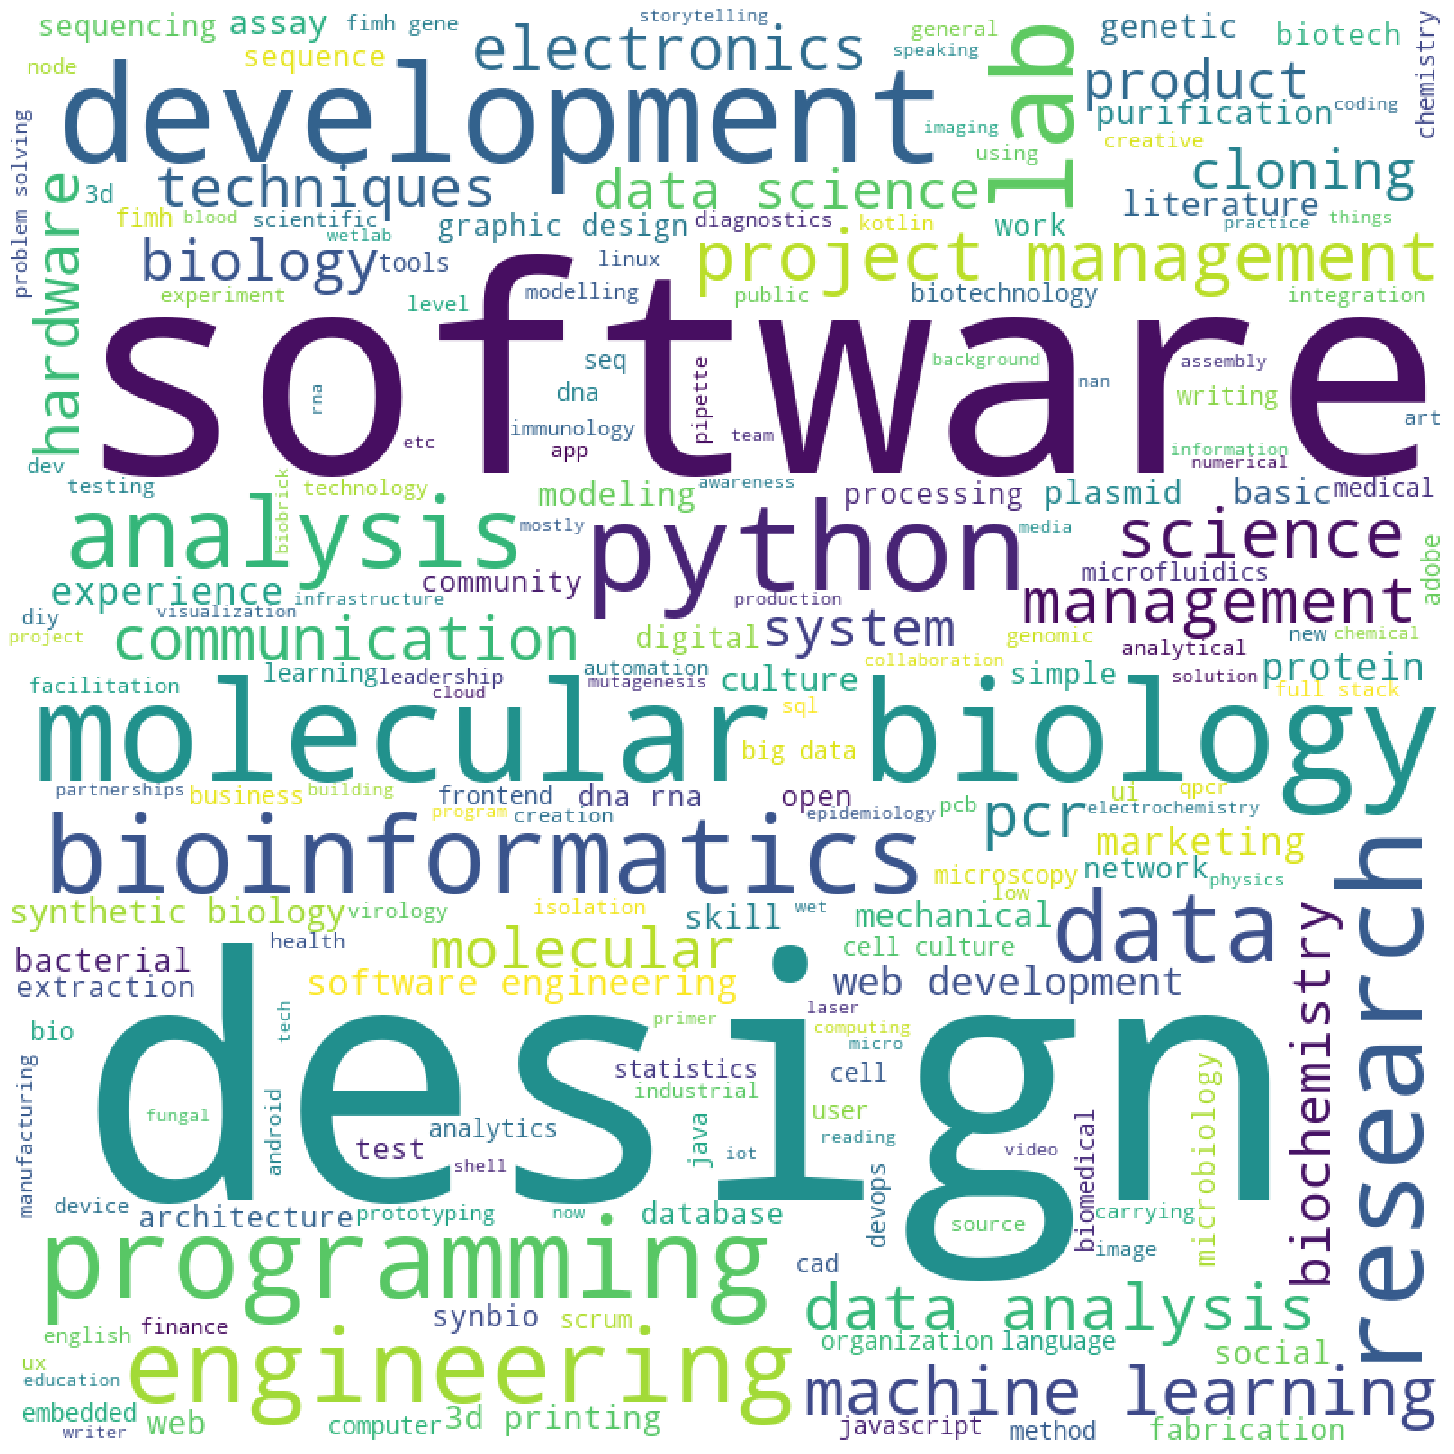

In [6]:
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloudskills) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

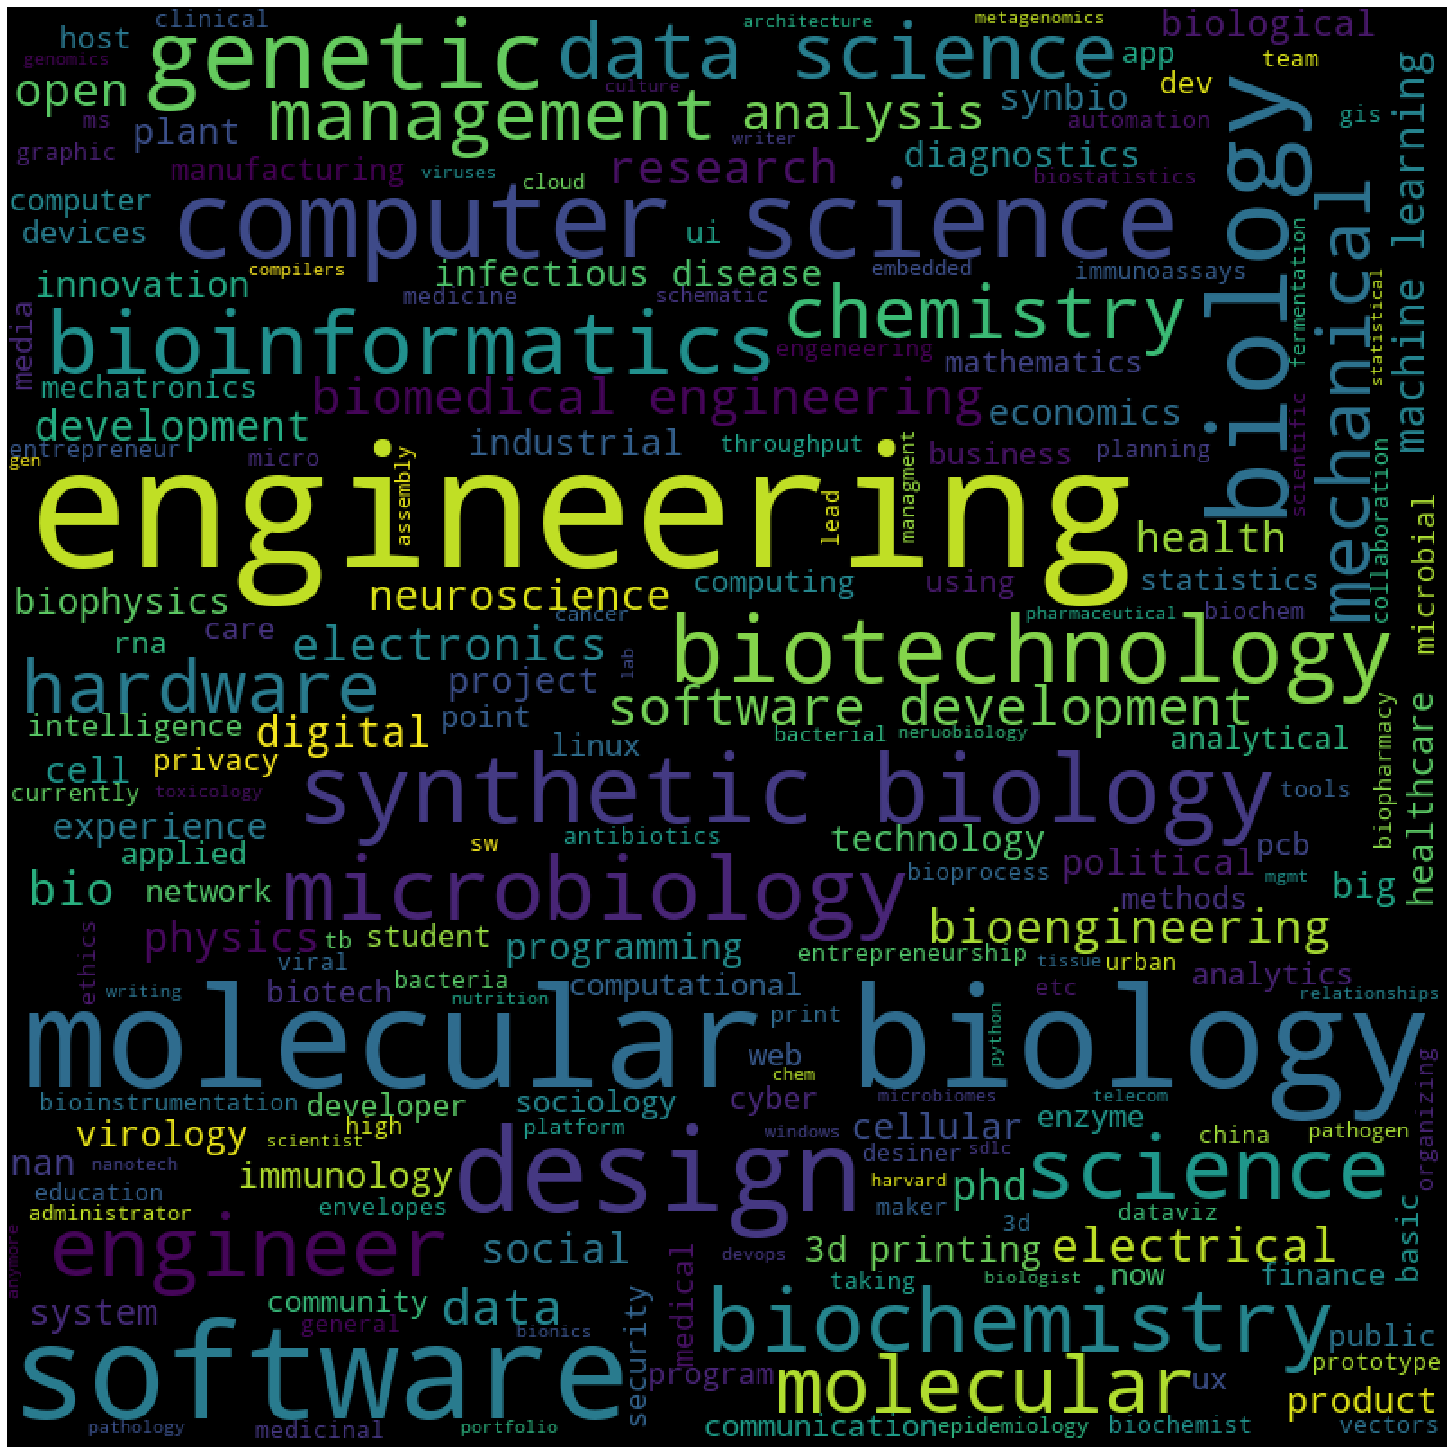

In [7]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.iloc[:,6]: #skills
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# to plot frequency per user 

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()




In [ ]:

##file name: Analysis4.R

library(quanteda)
library(tm)

#get a subset of messages
subset_messages <- messages_users[, c("message_text", "channel_name")]

#filter out the messages from mdsi_electives channel
mdsi_electives_msgs <- sqldf("select * from subset_messages
                                  where channel_name = 'mdsi_electives'", drv="SQLite")

#get only messages
messages <- mdsi_electives_msgs$message_text

#convert the messages to corpus for text analysis 
docs <- Corpus(VectorSource(messages))

#a function to replace contents in the text
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))

#convert the messages to lowercase
docs <- tm_map(docs, content_transformer(tolower))

#remove numbers
docs <- tm_map(docs, removeNumbers) 

#remove punctuation
docs <- tm_map(docs, removePunctuation)

#remove white space
docs <- tm_map(docs, stripWhitespace)

#remove common stop words
docs <- tm_map(docs, removeWords, stopwords('en'))

#convert the corpus back to text for checking collocations via quanteda library
msgs_text <- data.frame(text=sapply(docs, identity), 
                        stringsAsFactors=F)

#compute collocations of words, from quanteda library
colloq <- textstat_collocations(msgs_text$text, min_count = 2)



In [ ]:

##file name: Analysis4.R (continued...)

#need to increase the size of the device (plot) to incorporate long words
dev.new(width = 1000, height = 1000, unit = "px")

#create a wordcloud based on the collocations computed
wordcloud(words = colloq$collocation, freq = colloq$count,
          min.freq = 2, max.words=200, random.order=FALSE, rot.per=0.25, scale=c(4,.25),
          colors=brewer.pal(8, "Dark2"))